# Parameters EXPERT

Esta tabla contiene la información de los grupos de parámetros de funciones y Lambda expresiones.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'parameters__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('parameters')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-06-19 19:49:20.402001 Data cache files found ...
2024-06-19 19:49:20.439989 Data cache files successfully loaded!!
The dataset contains 61752 (40.13%) instances for BEGINNER class and 92146 (59.87%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'parameters'
TABLE_FEATURES = ['parameters__parameters_role', 'parameters__number_of_params', 'parameters__pos_only_param_pct', 'parameters__var_param_pct', 'parameters__has_var_param', 'parameters__type_annotation_pct', 'parameters__kw_only_param_pct', 'parameters__default_value_pct', 'parameters__has_kw_param', 'parameters__name_convention']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (92146, 10)
As we can see the downloaded data contains a total of 92146 instances. For each instance we have 10 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 92146 entries, 61752 to 153897
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   parameters__parameters_role      92146 non-null  object 
 1   parameters__number_of_params     92146 non-null  int64  
 2   parameters__pos_only_param_pct   92146 non-null  float64
 3   parameters__var_param_pct        92146 non-null  float64
 4   parameters__has_var_param        92146 non-null  bool   
 5   parameters__type_annotation_pct  92146 non-null  float64
 6   parameters__kw_only_param_pct    92146 non-null  float64
 7   parameters__default_value_pct    92146 non-null  float64
 8   parameters__has_kw_param         92146 non-null  bool   
 9   parameters__name_convention      83072 non-null  object 
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 6.5+ MB
None


Cómo podemos ver la tabla está compuesta por 6 variables numéricas, 2 variables boleanas y tres de tipo objeto.

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [98.07%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

parameters__parameters_role           0
parameters__number_of_params          0
parameters__pos_only_param_pct        0
parameters__var_param_pct             0
parameters__has_var_param             0
parameters__type_annotation_pct       0
parameters__kw_only_param_pct         0
parameters__default_value_pct         0
parameters__has_kw_param              0
parameters__name_convention        9074
dtype: int64

In [6]:
print_empty_cols(X)

parameters__parameters_role
---------------------------
0 instancias no tienen un valor para la columna parameters__parameters_role


parameters__number_of_params
----------------------------
0 instancias no tienen un valor para la columna parameters__number_of_params


parameters__pos_only_param_pct
------------------------------
0 instancias no tienen un valor para la columna parameters__pos_only_param_pct


parameters__var_param_pct
-------------------------
0 instancias no tienen un valor para la columna parameters__var_param_pct


parameters__has_var_param
-------------------------
0 instancias no tienen un valor para la columna parameters__has_var_param


parameters__type_annotation_pct
-------------------------------
0 instancias no tienen un valor para la columna parameters__type_annotation_pct


parameters__kw_only_param_pct
-----------------------------
0 instancias no tienen un valor para la columna parameters__kw_only_param_pct


parameters__default_value_pct
--------------

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
parameters__parameters_role,92146,2,FunctionParams,88089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameters__number_of_params,92146.0,NaN,NaN,NaN,2.07627,2.204672,0.0,1.0,2.0,3.0,58.0
parameters__pos_only_param_pct,92146.0,NaN,NaN,NaN,0.000049,0.005407,0.0,0.0,0.0,0.0,0.666667
parameters__var_param_pct,92146.0,NaN,NaN,NaN,0.009198,0.070615,0.0,0.0,0.0,0.0,1.0
parameters__has_var_param,92146,2,False,90218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameters__type_annotation_pct,92146.0,NaN,NaN,NaN,0.213628,0.351511,0.0,0.0,0.0,0.5,1.0
parameters__kw_only_param_pct,92146.0,NaN,NaN,NaN,0.007811,0.072913,0.0,0.0,0.0,0.0,1.0
parameters__default_value_pct,92146.0,NaN,NaN,NaN,0.092543,0.218201,0.0,0.0,0.0,0.0,1.0
parameters__has_kw_param,92146,2,False,84443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameters__name_convention,83072,7,Lower,59322,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "parameters__number_of_params": [(0.0, 1.0), (1.0, 2.0), (2.0, 2.0), (2.0, inf)], # min: 0 ; max: 58
    "parameters__pos_only_param_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
    "parameters__var_param_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "parameters__type_annotation_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
    "parameters__kw_only_param_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
    "parameters__default_value_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['parameters__number_of_params'], 10))
print(get_statistics(X_copy, ['parameters__pos_only_param_pct'], 10))
print(get_statistics(X_copy, ['parameters__var_param_pct'], 10))
print(get_statistics(X_copy, ['parameters__type_annotation_pct'], 10))
print(get_statistics(X_copy, ['parameters__kw_only_param_pct'], 10))
print(get_statistics(X_copy, ['parameters__default_value_pct'], 10))
print(get_statistics(full_table, ['parameters__name_convention'], 10))
print(get_statistics(full_table, ['parameters__parameters_role'], 10))
print(get_statistics(X_copy, ['parameters__has_var_param'], 10))
print(get_statistics(X_copy, ['parameters__has_kw_param'], 10))
# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
parameters__number_of_params  count  percentage
                   [1.0_2.0)  36070   39.144401
                   [2.0_2.0]  23876   25.911054
                   [2.0_inf]  23126   25.097128
                   [0.0_1.0)   9074    9.847416

parameters__pos_only_param_pct  count  percentage
                     [0.0_0.0]  92138   99.991318
                     [0.0_inf]      8    0.008682

parameters__var_param_pct  count  percentage
                [0.0_0.0]  90218   97.907668
                [0.0_inf]   1928    2.092332

parameters__type_annotation_pct  count  percentage
                      [0.0_0.0]  64963   70.500076
                      [0.0_inf]  27183   29.499924

parameters__kw_only_param_pct  count  percentage
                    [0.0_0.0]  90956   98.708571
                    [0.0_inf]   1190    1.291429

parameters__default_value_pct  count  percentage
                    [0.0_0.0]  75836   82.299829
                    [0.0_inf]  16310   17.700171


In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (92146, 17)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

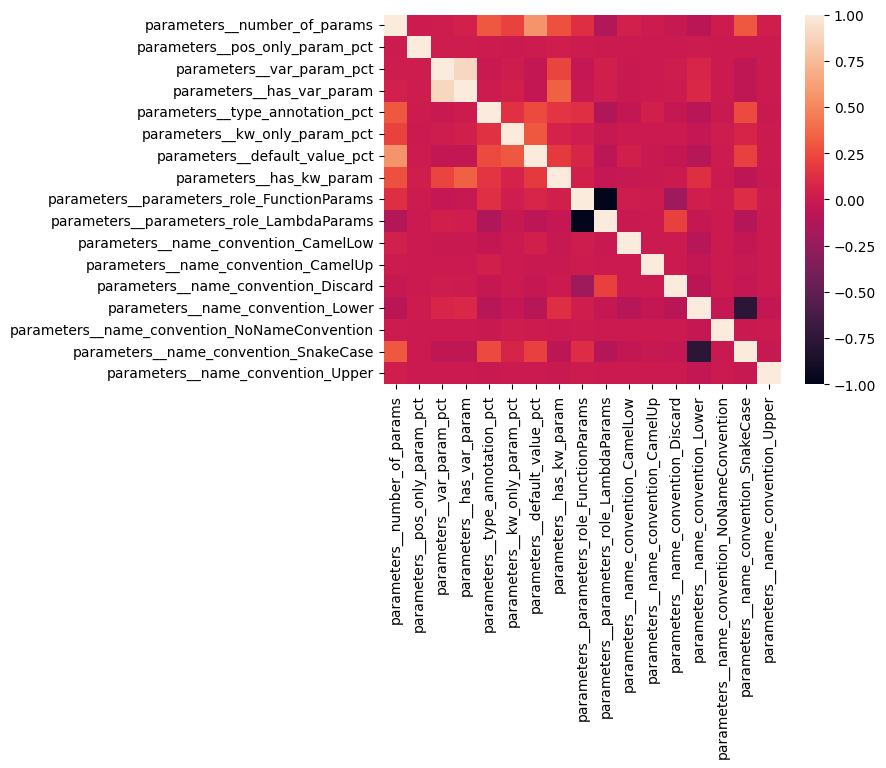

In [10]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 10 variable (2 booleanas, 5 porcentuales, 1 numerica y 2 cetgoricas) se hara un analisis detallado

### Variable has_var_param (1/10)
Esta variable es de tipo booleano y representa existe al menos un parámetro del tipo vararg.

<Axes: xlabel='parameters__has_var_param', ylabel='Count'>

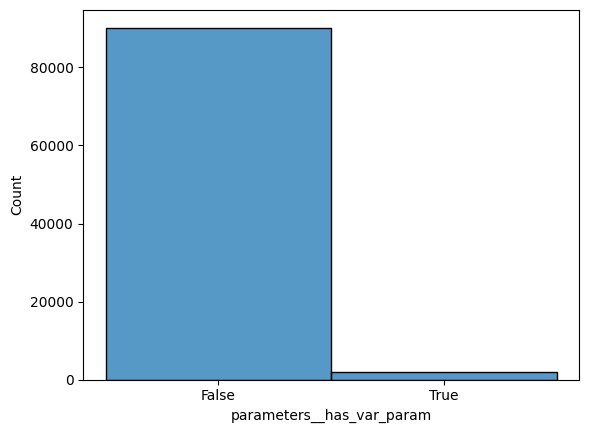

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['parameters__has_var_param'], discrete=True)

In [12]:
num_true_values = len(X[X['parameters__has_var_param'] == True])
num_false_values = len(X[X['parameters__has_var_param'] == False])
std = X['parameters__has_var_param'].std()
freq_true = len(X[X['parameters__has_var_param'] == True]) / len(X['parameters__has_var_param'])
freq_false = len(X[X['parameters__has_var_param'] == False]) / len(X['parameters__has_var_param'])
print(f'La variable has_var_param contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_var_param a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_var_param a False es {freq_false}.')

La variable has_var_param contiene 1928 valores verdaderos y 90218 valores falsos. Y, la desviación típica es de 0.14312845468521118
La frecuencia con la que programa puede tener la variable has_var_param a True es 0.020923317344214615.
La frecuencia con la que programa puede tener la variable has_var_param a False es 0.9790766826557854.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'parameters__has_var_param', possible_values)

La variable parameters__has_var_param contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable parameters__has_var_param toma el valor de 0.0 en un 97.91% de los items.
La variable parameters__has_var_param toma el valor de 1.0 en un 2.092% de los items.


In [14]:
X[X['parameters__has_var_param'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,1928.00000,1928.000000,1928.000000,1928.0,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.0,1928.000000,1928.000000,1928.0,1928.000000,1928.0
mean,2.78112,0.000605,0.439605,1.0,0.218280,0.023452,0.031849,0.705394,0.933091,0.066909,0.001037,0.0,0.005187,0.929461,0.0,0.064315,0.0
std,1.35875,0.015643,0.221666,0.0,0.352618,0.097951,0.112548,0.455984,0.249929,0.249929,0.032199,0.0,0.071851,0.256120,0.0,0.245377,0.0
min,1.00000,0.000000,0.058824,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
25%,2.00000,0.000000,0.333333,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0
50%,3.00000,0.000000,0.333333,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0
75%,3.00000,0.000000,0.500000,1.0,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0
max,17.00000,0.500000,1.000000,1.0,1.000000,0.823529,0.823529,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0


### Variable has_kw_param (2/10)
Esta variable es de tipo booleano y representa si existe al menos un parámetro del tipo kwarg.

<Axes: xlabel='parameters__has_kw_param', ylabel='Count'>

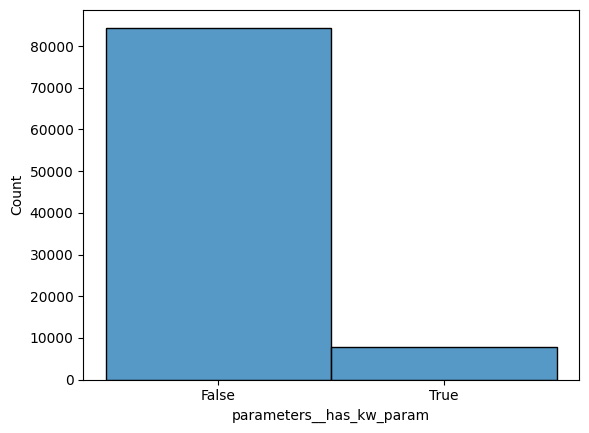

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['parameters__has_kw_param'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['parameters__has_kw_param'] == True])
num_false_values = len(X[X['parameters__has_kw_param'] == False])
std = X['parameters__has_kw_param'].std()
freq_true = len(X[X['parameters__has_kw_param'] == True]) / len(X['parameters__has_kw_param'])
freq_false = len(X[X['parameters__has_kw_param'] == False]) / len(X['parameters__has_kw_param'])
print(f'La variable has_kw_param contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_kw_param a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_kw_param a False es {freq_false}.')

La variable has_kw_param contiene 7703 valores verdaderos y 84443 valores falsos. Y, la desviación típica es de 0.2767818868160248
La frecuencia con la que programa puede tener la variable has_kw_param a True es 0.08359559828967074.
La frecuencia con la que programa puede tener la variable has_kw_param a False es 0.9164044017103292.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'parameters__has_kw_param', possible_values)

La variable parameters__has_kw_param contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable parameters__has_kw_param toma el valor de 0.0 en un 91.64% de los items.
La variable parameters__has_kw_param toma el valor de 1.0 en un 8.36% de los items.


In [18]:
X[X['parameters__has_kw_param'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,7703.000000,7703.000000,7703.000000,7703.000000,7703.000000,7703.000000,7703.000000,7703.0,7703.000000,7703.000000,7703.000000,7703.0,7703.000000,7703.000000,7703.0,7703.000000,7703.000000
mean,4.054654,0.000498,0.061821,0.176555,0.393628,0.022283,0.220745,1.0,0.981695,0.018305,0.000909,0.0,0.003116,0.841231,0.0,0.154615,0.000130
std,3.417423,0.017085,0.139529,0.381316,0.361217,0.114712,0.265866,0.0,0.134059,0.134059,0.030134,0.0,0.055735,0.365485,0.0,0.361561,0.011394
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000
75%,4.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.500000,1.0,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000
max,53.000000,0.666667,0.500000,1.000000,1.000000,0.944444,0.950000,1.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000


El 82% de los parameters con has_kw_param a True es de programas de EXPERTOS.

### Variable number_of_params (3/10)
Esta variable representa el número de parámetros que hay en el conjuto de la entidad parameters. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 58. Con una media de 2.07.

<Axes: ylabel='parameters__number_of_params'>

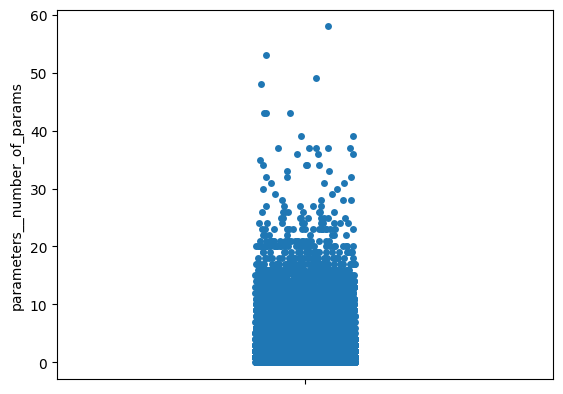

In [19]:
sns.stripplot(X['parameters__number_of_params'])

In [20]:
print_outliers_for_df_column(X, 'parameters__number_of_params')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8935936503642128
Rango valores atípicos extremos (Tukey): [-5.0,9.0]
Rango valores atípicos leves (Tukey): [-2.0,6.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.8685285403242677,110.01691329253248]
-3.0IQR: 0 instancias tienen un valor para parameters__number_of_params inferior a -5.0 (Q1-3*IQR) para parameters__number_of_params. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__number_of_params inferior a -2.0 (Q1-1.5*IQR) para parameters__number_of_params. Representando un 0.0% del total de instancias.
+1.5IQR: 3243 instancias tienen un valor para parameters__number_of_params superior a 6.0 (Q3+1.5*IQR) para parameters__number_of_params. Representando un 3.519% del total de instancias.
+3.0IQR: 1390 instancias tienen un valor para parameters__number_of_params superior a 9.0 (Q3-3*IQR) para parameters__number_of_params. Representando un 1.508% del total de instancia

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 9.0 (Con un MC de 40 usamos U)

In [21]:
X[X['parameters__number_of_params'] > 9].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,1390.000000,1390.0,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.0,1390.0,1390.000000,1390.000000,1390.0,1390.000000,1390.0,1390.000000,1390.000000
mean,14.007914,0.0,0.000605,0.007914,0.523905,0.098781,0.687856,0.315827,1.0,0.0,0.010791,0.001439,0.0,0.217986,0.0,0.766187,0.003597
std,5.263736,0.0,0.006848,0.088638,0.436902,0.263210,0.282171,0.465012,0.0,0.0,0.103357,0.037919,0.0,0.413026,0.0,0.423407,0.059890
min,10.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,11.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.636364,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000
50%,12.000000,0.0,0.000000,0.000000,0.846154,0.000000,0.800000,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000
75%,15.000000,0.0,0.000000,0.000000,0.923077,0.000000,0.875000,1.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000
max,58.000000,0.0,0.090909,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


El 83% de es de expertos.

### Variable pos_only_param_pct (4/10)
Esta variable representa la proporción de los parámetros pos_only. Toma los valores de 0.0 - 0.66.

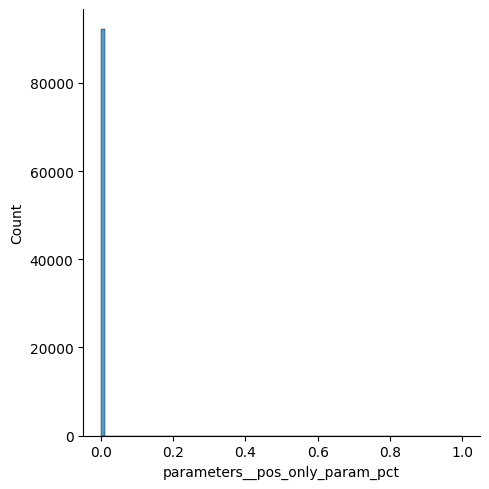

In [22]:
sns.displot(X['parameters__pos_only_param_pct'], bins=[i / 100 for i in range(0, 101)])

In [23]:
print_outliers_for_df_column(X, 'parameters__pos_only_param_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9954476744119398
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__pos_only_param_pct inferior a 0.0 (Q1-3*IQR) para parameters__pos_only_param_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__pos_only_param_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__pos_only_param_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 8 instancias tienen un valor para parameters__pos_only_param_pct superior a 0.0 (Q3+1.5*IQR) para parameters__pos_only_param_pct. Representando un 0.008682% del total de instancias.
+3.0IQR: 8 instancias tienen un valor para parameters__pos_only_param_pct superior a 0.0 (Q3-3*IQR) para parameters__pos_only_param_pct. Representando un 0.008682% del total de instancias.
L: 0 instancias

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [24]:
X[X['parameters__pos_only_param_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.000000,8.000000,8.0,8.0,8.0,8.0,8.0,8.000000,8.0,8.000000,8.0
mean,3.125000,0.562500,0.114583,0.375000,0.375000,0.0,0.125000,0.875000,1.0,0.0,0.0,0.0,0.0,0.875000,0.0,0.125000,0.0
std,0.353553,0.152688,0.160217,0.517549,0.415474,0.0,0.172516,0.353553,0.0,0.0,0.0,0.0,0.0,0.353553,0.0,0.353553,0.0
min,3.000000,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
25%,3.000000,0.458333,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
50%,3.000000,0.666667,0.000000,0.000000,0.333333,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
75%,3.000000,0.666667,0.270833,1.000000,0.666667,0.0,0.333333,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
max,4.000000,0.666667,0.333333,1.000000,1.000000,0.0,0.333333,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0


### Variable type_annotation_pct (5/10)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo. Este campo toma valores del 0.0 - 1.0. Su media es 0.21

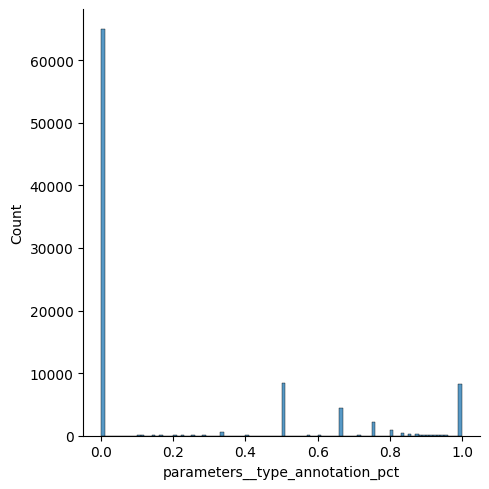

In [25]:
sns.displot(X['parameters__type_annotation_pct'], bins=[i / 100 for i in range(0, 101)])

In [26]:
print_outliers_for_df_column(X, 'parameters__type_annotation_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.43486079573631287
Rango valores atípicos extremos (Tukey): [-1.5,2.0]
Rango valores atípicos leves (Tukey): [-0.75,1.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.16370408225026883,4.770628945805498]
-3.0IQR: 0 instancias tienen un valor para parameters__type_annotation_pct inferior a -1.5 (Q1-3*IQR) para parameters__type_annotation_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__type_annotation_pct inferior a -0.75 (Q1-1.5*IQR) para parameters__type_annotation_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para parameters__type_annotation_pct superior a 1.25 (Q3+1.5*IQR) para parameters__type_annotation_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para parameters__type_annotation_pct superior a 2.0 (Q3-3*IQR) para parameters__type_annotation_pct. Representando un 0.0% de

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [27]:
X[X['parameters__type_annotation_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,27183.000000,27183.000000,27183.00000,27183.000000,27183.000000,27183.000000,27183.000000,27183.000000,27183.0,27183.0,27183.000000,27183.000000,27183.000000,27183.000000,27183.000000,27183.000000,27183.000000
mean,3.169444,0.000098,0.00753,0.021594,0.724165,0.022117,0.171261,0.167016,1.0,0.0,0.000147,0.002318,0.000589,0.596954,0.000074,0.399367,0.000552
std,2.745084,0.008087,0.05561,0.145358,0.221661,0.122028,0.276212,0.372997,0.0,0.0,0.012130,0.048087,0.024254,0.490519,0.008577,0.489777,0.023485
min,1.000000,0.000000,0.00000,0.000000,0.034483,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.00000,0.000000,0.500000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.00000,0.000000,0.666667,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.333333,0.000000,1.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,58.000000,0.666667,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


80% expertos y 20% beginners.

### Variable var_param_pct (6/10)
Esta variable representa la proporción de los parámetros que son del tipo vararg. Este campo toma valores del 0.0 - 1.0. Su media es 0.009.

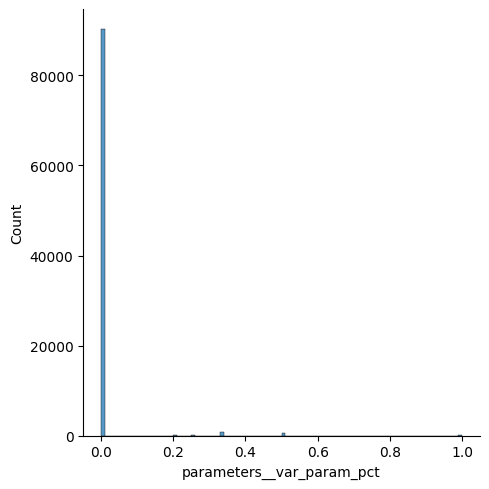

In [28]:
sns.displot(X['parameters__var_param_pct'], bins=[i / 100 for i in range(0, 101)])

In [29]:
print_outliers_for_df_column(X, 'parameters__var_param_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9302732883609687
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__var_param_pct inferior a 0.0 (Q1-3*IQR) para parameters__var_param_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__var_param_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__var_param_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1928 instancias tienen un valor para parameters__var_param_pct superior a 0.0 (Q3+1.5*IQR) para parameters__var_param_pct. Representando un 2.092% del total de instancias.
+3.0IQR: 1928 instancias tienen un valor para parameters__var_param_pct superior a 0.0 (Q3-3*IQR) para parameters__var_param_pct. Representando un 2.092% del total de instancias.
L: 0 instancias tienen un valor para parameters__var_pa

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [30]:
X[X['parameters__var_param_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,1928.00000,1928.000000,1928.000000,1928.0,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.0,1928.000000,1928.000000,1928.0,1928.000000,1928.0
mean,2.78112,0.000605,0.439605,1.0,0.218280,0.023452,0.031849,0.705394,0.933091,0.066909,0.001037,0.0,0.005187,0.929461,0.0,0.064315,0.0
std,1.35875,0.015643,0.221666,0.0,0.352618,0.097951,0.112548,0.455984,0.249929,0.249929,0.032199,0.0,0.071851,0.256120,0.0,0.245377,0.0
min,1.00000,0.000000,0.058824,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
25%,2.00000,0.000000,0.333333,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0
50%,3.00000,0.000000,0.333333,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0
75%,3.00000,0.000000,0.500000,1.0,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0
max,17.00000,0.500000,1.000000,1.0,1.000000,0.823529,0.823529,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0


### Variable kw_only_param_pct (7/10)
Esta variable representa la proporción de los parámetros del tipo kw_only. Este campo toma valores del 0.0 - 1.0. Su media es 0.007.

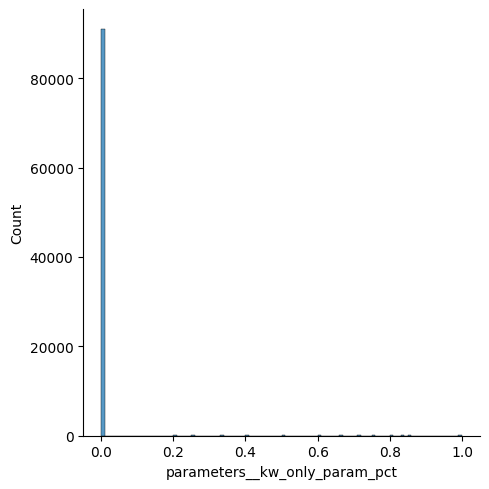

In [31]:
sns.displot(X['parameters__kw_only_param_pct'], bins=[i / 100 for i in range(0, 101)])

In [32]:
print_outliers_for_df_column(X, 'parameters__kw_only_param_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9425331972345675
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__kw_only_param_pct inferior a 0.0 (Q1-3*IQR) para parameters__kw_only_param_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__kw_only_param_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__kw_only_param_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1190 instancias tienen un valor para parameters__kw_only_param_pct superior a 0.0 (Q3+1.5*IQR) para parameters__kw_only_param_pct. Representando un 1.291% del total de instancias.
+3.0IQR: 1190 instancias tienen un valor para parameters__kw_only_param_pct superior a 0.0 (Q3-3*IQR) para parameters__kw_only_param_pct. Representando un 1.291% del total de instancias.
L: 0 instancias tienen 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [33]:
X[X['parameters__kw_only_param_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,1190.000000,1190.0,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.0,1190.0,1190.0,1190.000000,1190.000000,1190.000000,1190.0
mean,6.001681,0.0,0.023798,0.100000,0.646389,0.604811,0.645711,0.271429,0.999160,0.000840,0.0,0.0,0.0,0.556303,0.001681,0.442017,0.0
std,4.063623,0.0,0.077630,0.300126,0.336810,0.225015,0.214378,0.444884,0.028989,0.028989,0.0,0.0,0.0,0.497029,0.040979,0.496835,0.0
min,1.000000,0.0,0.000000,0.000000,0.000000,0.076923,0.142857,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,3.000000,0.0,0.000000,0.000000,0.500000,0.400000,0.500000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
50%,5.000000,0.0,0.000000,0.000000,0.750000,0.666667,0.666667,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0
75%,7.000000,0.0,0.000000,0.000000,0.900000,0.777778,0.800000,1.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.0
max,39.000000,0.0,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0


86% expertos y 14% beginners

### Variable default_value_pct (8/10)
Esta variable representa la proporción de los parámetros que tienen valor por defecto. Este campo toma valores del 0.0 - 1.0. Su media es 0.09.

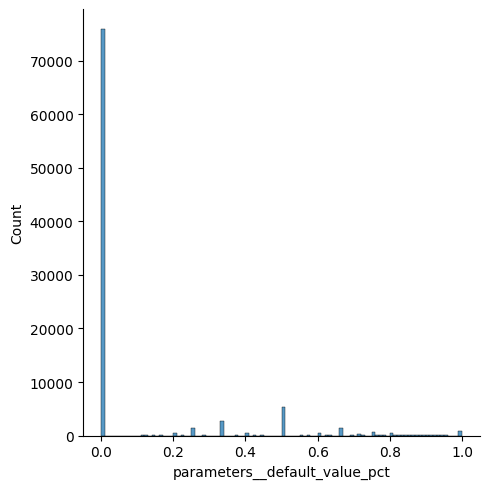

In [34]:
sns.displot(X['parameters__default_value_pct'], bins=[i / 100 for i in range(0, 101)])

In [35]:
print_outliers_for_df_column(X, 'parameters__default_value_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.741670465444032
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__default_value_pct inferior a 0.0 (Q1-3*IQR) para parameters__default_value_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__default_value_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__default_value_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 16310 instancias tienen un valor para parameters__default_value_pct superior a 0.0 (Q3+1.5*IQR) para parameters__default_value_pct. Representando un 17.7% del total de instancias.
+3.0IQR: 16310 instancias tienen un valor para parameters__default_value_pct superior a 0.0 (Q3-3*IQR) para parameters__default_value_pct. Representando un 17.7% del total de instancias.
L: 0 instancias tienen u

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [36]:
X[X['parameters__default_value_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,16310.000000,16310.000000,16310.000000,16310.00000,16310.000000,16310.000000,16310.000000,16310.000000,16310.000000,16310.000000,16310.000000,16310.000000,16310.000000,16310.000000,16310.000000,16310.000000,16310.000000
mean,4.563887,0.000123,0.002390,0.01030,0.401313,0.044128,0.522835,0.219007,0.994359,0.005641,0.011281,0.000123,0.000123,0.577069,0.000797,0.409810,0.000797
std,3.609426,0.009041,0.025068,0.10097,0.397937,0.168625,0.209806,0.413586,0.074895,0.074895,0.105616,0.011073,0.011073,0.494040,0.028222,0.491814,0.028222
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.00000,0.500000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000,0.00000,0.750000,0.000000,0.666667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,58.000000,0.666667,0.500000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable parameters_role (9/10)
Esta variable es de tipo categorica y representa si la entidad parameters proviene de una función de una Lambda expresión.

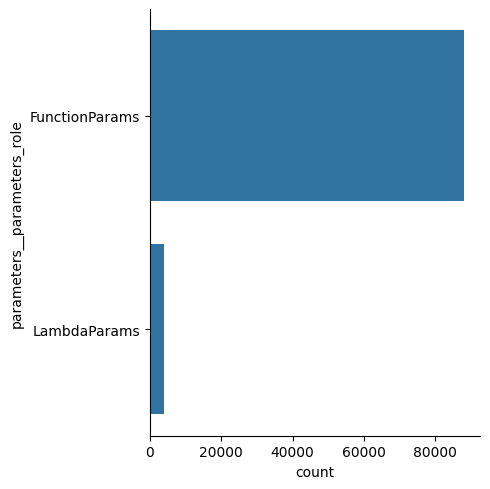

In [37]:
sns.catplot(full_table['parameters__parameters_role'], kind="count")

In [38]:
print_frequency_anal_for_cat_var(full_table, 'parameters__parameters_role')

La variable parameters__parameters_role contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable parameters__parameters_role toma el valor de FunctionParams en un 95.6% de los items.
La variable parameters__parameters_role toma el valor de LambdaParams en un 4.403% de los items.


In [39]:
print_values_usage_for_cat_var(full_table, 'parameters__parameters_role', PARAMETER_ROLE_VALUES)

La variable parameters__parameters_role puede tomar 2 valores distintos
	2 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


### Variable name_convention (10/10)
Esta variable es de tipo categorica y representa el name convention del nombre del parámetro.

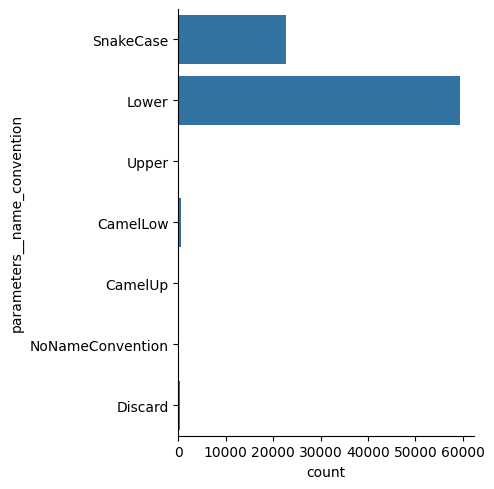

In [40]:
sns.catplot(full_table['parameters__name_convention'], kind="count")

In [41]:
print_frequency_anal_for_cat_var(full_table, 'parameters__name_convention')

La variable parameters__name_convention contiene 8 valores distintos.
El umbral de outlier es de 0.025%
La variable parameters__name_convention toma el valor de Lower en un 64.38% de los items.
La variable parameters__name_convention toma el valor de SnakeCase en un 24.63% de los items.
La variable parameters__name_convention toma el valor de None en un 9.847% de los items.
La variable parameters__name_convention toma el valor de CamelLow en un 0.5166% de los items.
La variable parameters__name_convention toma el valor de Discard en un 0.4005% de los items.
La variable parameters__name_convention toma el valor de Upper en un 0.1085% de los items.
La variable parameters__name_convention toma el valor de CamelUp en un 0.08465% de los items.
La variable parameters__name_convention toma el valor de NoNameConvention en un 0.03364% de los items.


In [42]:
print_values_usage_for_cat_var(full_table, 'parameters__name_convention', NAMING_CONVENTION_VALUES)

La variable parameters__name_convention puede tomar 7 valores distintos
	8 (114.3%) valores utilizados
	0 (0.0%) valores NO utilizados
La variable parameters__name_convention toma 1 valores desconocidos
		La variable parameters__name_convention toma valor el desconocido None.


## Multivariate

Isolation forest algorithm

In [43]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,parameters__parameters_role,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__has_kw_param,parameters__default_value_pct,parameters__name_convention,parameters__expertise_level
69383,LambdaParams,1,0.0,1.0000,True,0.000000,0.000000,False,0.000000,Discard,EXPERT
69384,LambdaParams,1,0.0,1.0000,True,0.000000,0.000000,False,0.000000,Discard,EXPERT
70428,FunctionParams,18,0.0,0.0000,False,0.000000,0.888889,True,0.888889,SnakeCase,EXPERT
70430,FunctionParams,15,0.0,0.0000,False,0.000000,0.866667,True,0.866667,SnakeCase,EXPERT
99432,FunctionParams,16,0.0,0.0625,True,0.937500,0.500000,True,0.750000,SnakeCase,EXPERT
...,...,...,...,...,...,...,...,...,...,...,...
144844,FunctionParams,12,0.0,0.0000,False,0.833333,0.833333,True,0.833333,SnakeCase,EXPERT
144896,FunctionParams,11,0.0,0.0000,False,0.818182,0.818182,True,0.818182,SnakeCase,EXPERT
145073,FunctionParams,15,0.0,0.0000,False,0.866667,0.866667,True,0.866667,SnakeCase,EXPERT
145168,FunctionParams,11,0.0,0.0000,False,0.818182,0.818182,True,0.818182,SnakeCase,EXPERT


### IMPORTANTE
Revisar los outliers detectados.

In [44]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
parameters__number_of_params,74.0,14.243243,7.182190,1.0,12.000000,15.000000,17.750000,39.0
parameters__pos_only_param_pct,74.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
parameters__var_param_pct,74.0,0.130798,0.327107,0.0,0.000000,0.000000,0.000000,1.0
parameters__has_var_param,74.0,0.216216,0.414473,0.0,0.000000,0.000000,0.000000,1.0
parameters__type_annotation_pct,74.0,0.725454,0.341858,0.0,0.762500,0.861905,0.933333,1.0
parameters__kw_only_param_pct,74.0,0.746625,0.298307,0.0,0.773352,0.857143,0.910973,1.0
parameters__default_value_pct,74.0,0.755603,0.296662,0.0,0.773352,0.857143,0.930780,1.0
parameters__has_kw_param,74.0,0.648649,0.480651,0.0,0.000000,1.000000,1.000000,1.0
parameters__parameters_role_FunctionParams,74.0,0.878378,0.329079,0.0,1.000000,1.000000,1.000000,1.0
parameters__parameters_role_LambdaParams,74.0,0.121622,0.329079,0.0,0.000000,0.000000,0.000000,1.0


In [45]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
parameters__number_of_params,92072.0,2.066491,2.168988,0.0,1.0,2.0,3.0,58.000000
parameters__pos_only_param_pct,92072.0,0.000049,0.005409,0.0,0.0,0.0,0.0,0.666667
parameters__var_param_pct,92072.0,0.009100,0.069955,0.0,0.0,0.0,0.0,1.000000
parameters__has_var_param,92072.0,0.020766,0.142602,0.0,0.0,0.0,0.0,1.000000
parameters__type_annotation_pct,92072.0,0.213217,0.351221,0.0,0.0,0.0,0.5,1.000000
parameters__kw_only_param_pct,92072.0,0.007217,0.069362,0.0,0.0,0.0,0.0,1.000000
parameters__default_value_pct,92072.0,0.092010,0.217317,0.0,0.0,0.0,0.0,1.000000
parameters__has_kw_param,92072.0,0.083141,0.276097,0.0,0.0,0.0,0.0,1.000000
parameters__parameters_role_FunctionParams,92072.0,0.956034,0.205020,0.0,1.0,1.0,1.0,1.000000
parameters__parameters_role_LambdaParams,92072.0,0.043966,0.205020,0.0,0.0,0.0,0.0,1.000000
